In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from IPython.display import display
from scipy import stats
import numpy as np


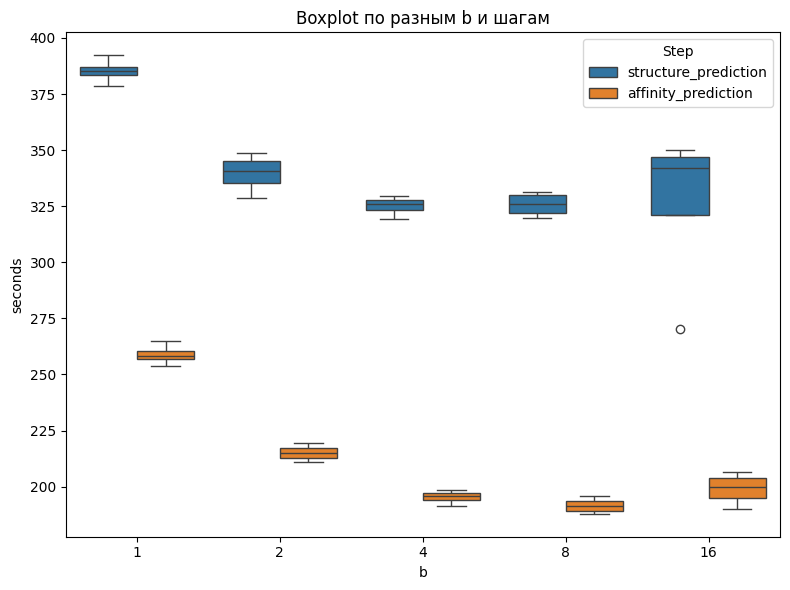

In [2]:
df = pd.read_csv('../results_summary/hmin_time.tsv', sep='\t')
df['b'] = df['source'].apply(lambda x: int(re.search(r"b(\d+)", x).group(1)))
df['r'] = df['source'].apply(lambda x: int(re.search(r"r(\d+)", x).group(1)))
df_hmin = df.copy()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_hmin, x='b', y='seconds', hue='step')
plt.xlabel('b')
plt.ylabel('seconds')
plt.legend(title='Step')
plt.tight_layout()
plt.show()


In [3]:
def highlight_max_reduction(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def mean_ci(series, confidence=0.95):
    n = series.count()
    mean = series.mean()
    h = stats.sem(series) * stats.t.ppf((1 + confidence) / 2, n - 1) if n > 1 else 0
    return pd.Series({'mean': mean, 'ci': h})

grouped = df_hmin.groupby(['b', 'step'])['seconds'].apply(mean_ci).unstack()
mean_df = grouped['mean'].unstack()
ci_df = grouped['ci'].unstack()

mean_df['total_time'] = mean_df['affinity_prediction'] + mean_df['structure_prediction']
ci_df['total_time'] = np.sqrt(ci_df['affinity_prediction']**2 + ci_df['structure_prediction']**2)

Tb = mean_df['total_time']
dTb = ci_df['total_time']
T1 = mean_df.loc[1, 'total_time']
dT1 = ci_df.loc[1, 'total_time']

reduction_percent = 100 * (1 - Tb / T1)
reduction_ci = 100 * np.sqrt(
    (dTb / T1) ** 2 +
    ((Tb * dT1) / (T1 ** 2)) ** 2
)

final_df = pd.DataFrame(index=mean_df.index)

for col in ['affinity_prediction', 'structure_prediction', 'total_time']:
    final_df[col] = mean_df[col].round(2).astype(str) + " ± " + ci_df[col].round(2).astype(str)

final_df['reduction_percent_vs_b1'] = reduction_percent.round(2)
final_df['reduction_ci'] = reduction_ci.round(2)
final_df['reduction_with_ci'] = final_df['reduction_percent_vs_b1'].astype(str) + " ± " + final_df['reduction_ci'].astype(str)
final_df = final_df.drop(columns='reduction_ci')

styled_final = final_df.style.apply(
    highlight_max_reduction, subset=['reduction_percent_vs_b1']
)

styled_final


,affinity_prediction,structure_prediction,total_time,reduction_percent_vs_b1,reduction_with_ci
b,,,,,
1,258.82 ± 7.22,385.34 ± 8.98,644.16 ± 11.53,0.000000,0.0 ± 2.53
2,215.04 ± 5.76,339.66 ± 13.89,554.7 ± 15.04,13.890000,13.89 ± 2.8
4,195.4 ± 5.01,325.14 ± 7.15,520.53 ± 8.74,19.190000,19.19 ± 1.98
8,191.56 ± 5.75,325.81 ± 8.68,517.38 ± 10.42,19.680000,19.68 ± 2.16
16,199.15 ± 11.59,326.07 ± 59.52,525.22 ± 60.64,18.460000,18.46 ± 9.53


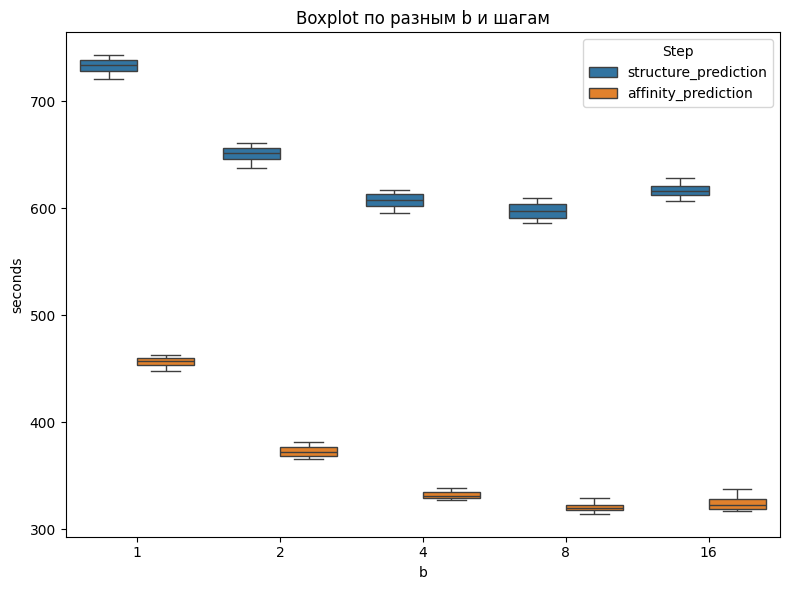

In [4]:
df = pd.read_csv('../results_summary/hbase_time.tsv', sep='\t')
df['b'] = df['source'].apply(lambda x: int(re.search(r"b(\d+)", x).group(1)))
df['r'] = df['source'].apply(lambda x: int(re.search(r"r(\d+)", x).group(1)))
df_hbase = df.copy()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_hbase, x='b', y='seconds', hue='step')
plt.xlabel('b')
plt.ylabel('seconds')
plt.legend(title='Step')
plt.tight_layout()
plt.show()

In [5]:
grouped = df_hbase.groupby(['b', 'step'])['seconds'].apply(mean_ci).unstack()
mean_df = grouped['mean'].unstack()
ci_df = grouped['ci'].unstack()

mean_df['total_time'] = mean_df['affinity_prediction'] + mean_df['structure_prediction']
ci_df['total_time'] = np.sqrt(ci_df['affinity_prediction']**2 + ci_df['structure_prediction']**2)

Tb = mean_df['total_time']
dTb = ci_df['total_time']
T1 = mean_df.loc[1, 'total_time']
dT1 = ci_df.loc[1, 'total_time']

reduction_percent = 100 * (1 - Tb / T1)
reduction_ci = 100 * np.sqrt(
    (dTb / T1) ** 2 +
    ((Tb * dT1) / (T1 ** 2)) ** 2
)

final_df = pd.DataFrame(index=mean_df.index)

for col in ['affinity_prediction', 'structure_prediction', 'total_time']:
    final_df[col] = mean_df[col].round(2).astype(str) + " ± " + ci_df[col].round(2).astype(str)

final_df['reduction_percent_vs_b1'] = reduction_percent.round(2)
final_df['reduction_ci'] = reduction_ci.round(2)
final_df['reduction_with_ci'] = final_df['reduction_percent_vs_b1'].astype(str) + " ± " + final_df['reduction_ci'].astype(str)
final_df = final_df.drop(columns='reduction_ci')

styled_final = final_df.style.apply(
    highlight_max_reduction, subset=['reduction_percent_vs_b1']
)

styled_final


,affinity_prediction,structure_prediction,total_time,reduction_percent_vs_b1,reduction_with_ci
b,,,,,
1,456.19 ± 9.96,733.05 ± 14.88,1189.24 ± 17.91,0.000000,0.0 ± 2.13
2,373.12 ± 11.24,650.44 ± 15.95,1023.56 ± 19.52,13.930000,13.93 ± 2.09
4,332.21 ± 7.99,607.14 ± 14.93,939.34 ± 16.93,21.010000,21.01 ± 1.86
8,320.83 ± 9.48,597.68 ± 16.28,918.51 ± 18.84,22.760000,22.76 ± 1.97
16,324.72 ± 14.7,616.84 ± 14.44,941.56 ± 20.6,20.830000,20.83 ± 2.1
